# 신뢰구간

### Uniform Distribution 균등분포
분포 Distribution

In [6]:
from numpy.random import uniform

In [7]:
# 0 ~ 100 사이에서 숫자 30 개를 골고루 뽑는다

x = uniform(0, 100, 30)
x

array([22.21958706, 95.25430906, 51.83465941, 74.61446135, 48.7065552 ,
       70.73973529, 73.22828574, 78.38277972, 61.5795164 , 73.08323728,
       22.71758412, 34.1465593 , 78.75950718,  1.13642488, 34.13448168,
       94.35968952, 58.03513092,  9.19141096,  0.10956451, 56.03008276,
       64.96132902, 20.62346829, 88.86089025, 85.67370617, 47.43414347,
        9.8272529 ,  9.1957484 , 20.06209952,  5.59230521, 53.48297231])

In [8]:
import numpy as np

In [9]:
np.mean(x)

48.132582595716734

In [10]:
l = []
for _ in range(50): # i 를 for 문 안에서 안 쓰는 경우 _ underbar 를 쓴다(투명한 느낌)
    x = uniform(0, 100, 30) # 데이터 x 를 만든다: sampling
    m = np.mean(x) # x 의 평균
    l.append(m)
print(l)

[51.44652613725943, 54.310397975789414, 47.55238961025455, 47.7476569656192, 42.27328629835458, 44.81523880410107, 53.84246196754622, 58.19004468305223, 47.20609711233481, 52.7470690551416, 51.586624552338805, 48.340280733667, 39.51729675219357, 46.29123857310618, 46.76025326709766, 50.013815549245585, 44.32966656907258, 53.8681225415046, 48.76605297240006, 45.299514590528204, 50.790663277087916, 50.57681730256488, 46.17445269444995, 51.66566539229927, 51.33146961737317, 50.665073614814375, 52.251673107384825, 53.677903093000964, 42.057683777346575, 47.22349305301345, 48.854345218369964, 48.93316006447734, 52.30095834704578, 50.80950968285084, 50.936195785298224, 43.407368461077425, 56.324469658297055, 54.351182402471615, 55.11580633696295, 53.43372074501927, 47.227064944148054, 49.712293775406366, 52.42809587450471, 40.11416404081855, 51.64583644115872, 54.10203400215912, 47.0874975500706, 52.55050352068913, 49.18134213519996, 48.017916662201515]


In [11]:
import seaborn as sns

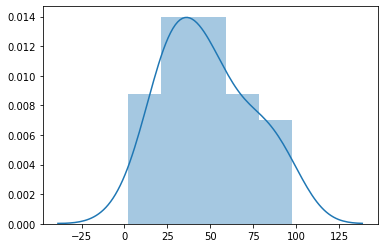

In [12]:
sns.distplot(x) # 하나의 샘플에서 데이터가 어떻게 퍼져있는가 Sampling Distribution

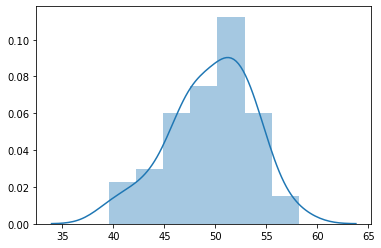

In [13]:
sns.distplot(l) # 샘플링할 때마다 평균이 어떻게 달라지는가

모분포를 sampling 하면
- 모분포를 닮지만 sample 마다 조금씩 달라진다
- 평균의 Sampling Distribution 을 구하면 모분포의 평균

- 중간값의 Sampling Distribution 도 구할 수 있다

In [14]:
import sklearn

<95 % 신뢰구간>의 의미: 95 % 확실하다

### 95 % 신뢰구간

In [15]:
np.quantile(l, .025) # 하위 2.5%

40.55145598153736

In [16]:
np.quantile(l, .975) # 상위 2.5%

56.05252041099688

→ 41.3 ~ 61.7 안에 평균이 있을 가능성이 95 %

### 99 % 신뢰구간 

In [17]:
np.quantile(l, .005) # 하위 0.5%

39.663529237906694

In [18]:
np. quantile(l, .995) # 상위 0.5 %

57.732978801987215

→ 40.5 ~ 63.1 안에 평균이 있을 가능성이 99 %

In [19]:
import pandas as pd

In [20]:
cars = pd.read_csv('cars.csv')

cars.head() # dist: 해당 속도로 가다가 브레이크 밟았을 때 완전히 멈출 때까지 걸린 거리(제동 거리)

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [21]:
cars['speed'].mean()

15.4

In [22]:
np.mean(cars['speed'])

15.4

# Bootstraping
- Sample 하나가 있을 때 
    - Sample 이 모분포와 비슷하다고 가정한다
    - Sample 이 충분히 크면 모분포와 비슷할 확률이 크다고 본다
- 그 Sample 안에서 무작위로 데이터를 뽑아서 Sample 여러개를 만든다
- 거기에서 평균이 존재할 가능성이 95 % 인 구간을 찾는다

- 복잡한 분포도 다룰 수 있다

In [23]:
# Resample: 가지고 있는 Sample 에서 다시 Sample 을 뽑아준다

from sklearn.utils import resample

In [24]:
resample([3, 4, 5])

[5, 5, 5]

In [49]:
ms = []
for _ in range(100000):
    x = resample(cars['speed']) # 가지고 있는 Sample 에서 다시 Sampling
    m = np.mean(x)
    ms.append(m)

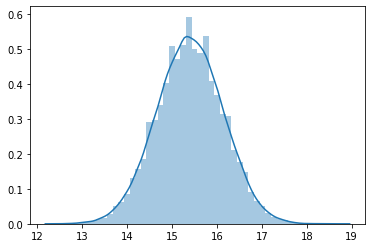

In [50]:
sns.distplot(ms)

In [51]:
np.quantile(ms, .025)

13.94

In [52]:
np.quantile(ms, .975)

16.84

In [53]:
np.mean(ms)

15.399146800000002

### 오차범위 구할 때 Bootstrapping 을 추천한다
- 어떤 경우에도 사용 가능하다
- Resample 을 충분히 많이하면 된다 10만개, 100만개

In [54]:
15.399146800000002 - 16.84

-1.4408531999999976

In [55]:
15.399146800000002 - 13.94

1.4591468000000027

신뢰구간
- 15.39 +- 1.4
- 13.92 ~ 16.84

### 실습) cars 의 dist 컬럼의 중간값median 을 구하고, 그 95 % 신뢰구간 구하기

In [37]:
cars['dist'].median()

36.0

In [38]:
np.median(cars['dist'])

36.0

In [40]:
# Bootstrapping
ms = []

for _ in range(10000):
    x = resample(cars['dist'])
    m = x.median()
    ms.append(m)

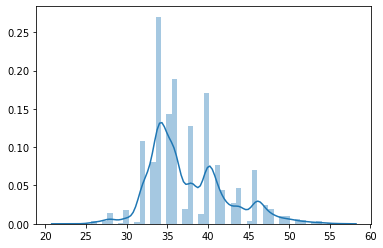

In [42]:
sns.distplot(ms)

In [43]:
np.quantile(ms, .025)

30.0

In [44]:
np.quantile(ms, .975)

48.024999999999636

In [46]:
np.mean(ms)

37.5375

In [47]:
37.5375 - 30

7.537500000000001

In [48]:
48.0249 - 37.5375

10.487400000000001

신뢰구간 30 ~ 48.025

### cars 데이터로 그래프(산점도) 그린다
- x-axis: speed, y-axis: dist
- 이 데이터를 가장 잘 설명할 수 있는 선형모형 추정

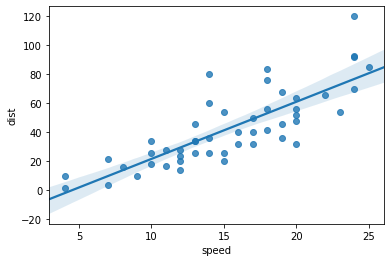

In [56]:
sns.regplot('speed', 'dist', cars)

그래프에서는 선형모형을 보여주기만 하고, a, b 값은 알 수 없음

→ a, b 직접 추정

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()

In [61]:
x = cars[['speed']] # 독립변수 Independent Variable
y = cars['dist']    # 종속변수 Dependent Variable

# fit 함수가 Parameter 추정 알아서 다 해준다
model.fit(x, y)     # 파라미터Parameter 추정

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
model.coef_         # 독립변수의 가중치(계수coefficient)(ax + b 에서 a 에 해당)

array([3.93240876])

In [63]:
model.intercept_    # y 절편(ax + b 에서 b 에 해당)

-17.57909489051095

In [70]:
cars['speed'].head() # list

0    4
1    4
2    7
3    7
4    8
Name: speed, dtype: int64

In [67]:
cars[['speed']].head() # DataFrame

,speed
0,4
1,4
2,7
3,7
4,8


### 실습) Bootstrapping 으로 선형 모형 파라미터의 95 % 의 신뢰구간 구하기

In [73]:
# 짝을 바꿔버리면 안됨

resample(cars).head()

,Unnamed: 0,speed,dist
41,42,20,56
46,47,24,92
19,20,14,26
27,28,16,40
17,18,13,34


In [91]:
resample(cars).mean()

Unnamed: 0    23.82
speed         14.46
dist          41.48
dtype: float64

In [97]:
coefs = []
intercepts = []

for _ in range(10000):
    df = resample(cars)                  # Sampling
    x = df[['speed']]                    # Independent Variable
    y = df['dist']                       # Dependent Variable
    
    model = LinearRegression()           # 모형 만들기
    model.fit(x, y)                      # Parameter 추정
    
    coefs.append(model.coef_)            # 추정한 계수를 리스트에 추가
    intercepts.append(model.intercept_)  # 추정한 절편을 리스트에 추가

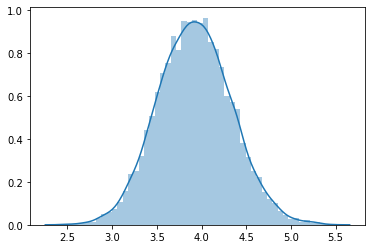

In [98]:
sns.distplot(coefs)

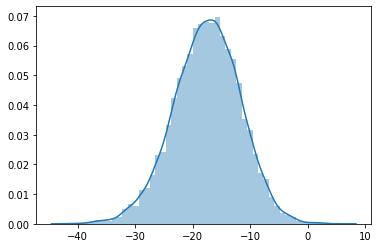

In [99]:
sns.distplot(intercepts)

In [103]:
np.mean(coefs)

3.9243096949054728

In [100]:
np.quantile(coefs, [.025, .975])

array([3.1391359 , 4.74828716])

In [104]:
np.mean(intercepts)

-17.551351443819662

In [101]:
np.quantile(intercepts, [.025, .975])

array([-29.33964633,  -6.76754515])

#### 계수가 + 값인 경우
- 양의 상관관계
- 속도가 빨라질수록 제동거리도 길어진다

#### 계수가 - 값인 경우
- 음의 상관관계

#### 신뢰구간이 - 값에서 + 값까지 퍼져있는 경우
- 속도에 따라 제동거리가 짧아지는 것도 있고 길어지는 것도 있다
- 해석이 엇갈리기 때문에 액션을 취할 수 없다
- data 를 더 많이 모아야 한다


# Sample Size 에 따른 신뢰구간의 길이
- Sample 의 크기가 커지면, 신뢰구간은 좁아진다
- 신뢰구간은 Sample Size 에 따라서만 달라진다
- 설문조사할 때 전체 집단(한국 국민 수 등)의 크기는 중요하지 않다

In [105]:
sample_size = 30

In [106]:
ms = []
for _ in range(10000):
    x = uniform(0, 100, sample_size)
    m = np.mean(x)
    ms.append(m)
np.quantile(ms, [.025, .975])

array([39.72829756, 60.22369328])

In [107]:
sample_size = 100000

In [108]:
ms = []
for _ in range(10000):
    x = uniform(0, 100, sample_size)
    m = np.mean(x)
    ms.append(m)
np.quantile(ms, [.025, .975])

array([49.82163615, 50.17758079])

### Resample 횟수와 신뢰구간과의 관계
- 작은 Sample(신뢰구간 넓음) 을 가지고 Resample 을 많이 하는 것(신뢰구간을 정확하게 추정할 수 있다)
- 큰 Sample(신뢰구간 좁음)

- Bootstrapping: resample 을 해서 신뢰구간을 정확하게 추정하기 위해서 사용한다

    **신뢰구간을 정확하게 추정하게되면 대체로 추정 신뢰구간이 넓어지는 쪽으로 정확해진다*
    - resample 수가 적으면 추정 신뢰구간이 좁고 부정확하다

### 좋은 신뢰구간
: 의사결정을 하기 위해서
1. 좁은 것
2. 정확한 것


- 신뢰구간의 정답: 모분포에서 무한히 Sampling
- Bootstrapping: 우리가 가진 sample 로 적당히 많이 Sampling

### 신뢰구간이 넓은지 좁은지 판단
- (+) 값 (-) 값 사이에 있다면 확실히 넓다(최소한의 기준)
- 현실적인 기준을 추가

### Sample 이 충분한지 판단
- 신뢰구간이 충분히 좁으면 충분하다
- Sample 이 충분한지는 신뢰구간을 구해봐야 안다
- Sample Size 를 키우는 것은 시간과 돈이 든다

# 과적합 overfitting

- Parameter 추정 = Fit
- 현재 가진 표본에 지나치게 치우친 추정을 하는 것
- 실제 분포와 거리가 있어 예측력이 떨어진다


- overfitting 을 막으려면 Parameter 가 적은 것이 좋다

# 교차검증 Cross Validation
- 현재 데이터를 training set 와 test set 으로 무작위 분할
- training set 으로 추정
- test set 으로 테스트
- 과적합이 있는 경우 training set 에 비해 test set 의 예측이 떨어짐

# 정규화 Regulazation
- 과적합을 방지하는 방법들
- 과도한 추정치에 페널티를 부과한다
- 추정을 조기에 중단한다